# Loan Application Status Prediction

In [1]:
# I will import the important libraries 
import pandas as pd
import numpy  as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('loan_approval.csv')
df

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,Unnamed: 8,360,1,Urban,Y
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
609,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
610,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
611,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df = pd.read_csv("loan_approval.csv", skiprows=1, header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
609,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
610,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
611,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [1]:
# Giving the column names to  the dataset :

In [4]:
columns = ['Loan_ID', 'Gender','Married','Dependents','Education','Self_Employed','Applicant Income','CoapplicantIncome','Loan_Amount','Loan_Amount_Term','Credit History','Property_Area','Loan_Status']
df.columns = columns

In [5]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
609,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
610,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
611,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
# I will drop the loan_ID first
df = df.drop('Loan_ID', axis = 1)
df

,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
608,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
609,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
610,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
611,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Checking the dataset :

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             600 non-null    object 
 1   Married            610 non-null    object 
 2   Dependents         598 non-null    object 
 3   Education          613 non-null    object 
 4   Self_Employed      581 non-null    object 
 5   Applicant Income   613 non-null    int64  
 6   CoapplicantIncome  613 non-null    float64
 7   Loan_Amount        592 non-null    float64
 8   Loan_Amount_Term   599 non-null    float64
 9   Credit History     563 non-null    float64
 10  Property_Area      613 non-null    object 
 11  Loan_Status        613 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.6+ KB


In [8]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
Applicant Income      0
CoapplicantIncome     0
Loan_Amount          21
Loan_Amount_Term     14
Credit History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History
count,613.000000,613.000000,592.000000,599.000000,563.000000
mean,5402.732463,1623.890571,146.412162,341.969950,0.841918
std,6114.004114,2927.903583,85.587325,65.170672,0.365142
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3812.000000,1210.000000,128.000000,360.000000,1.000000
75%,5780.000000,2302.000000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [11]:
df['Loan_Status'].value_counts()

Y    421
N    192
Name: Loan_Status, dtype: int64

In [ ]:
# First I will balance the dataset :

In [12]:
df_Y = df[df['Loan_Status'] == 'Y']
df_N = df[df['Loan_Status'] == 'N']

# Randomly sample 200 rows from Y
df_Y_sampled = df_Y.sample(200, random_state=42)  # Set random_state for reproducibility

# Combine the sampled Y rows with all N rows
df_filtered = pd.concat([df_Y_sampled, df_N])

In [13]:
df_filtered

,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
218,Female,Yes,2,Graduate,No,4283,2383.0,127.0,360.0,NaN,Semiurban,Y
487,Male,Yes,2,Graduate,Yes,4583,2083.0,160.0,360.0,1.0,Semiurban,Y
262,Female,No,0,Graduate,No,7200,0.0,120.0,360.0,1.0,Rural,Y
536,Male,No,2,Graduate,No,3617,0.0,107.0,360.0,1.0,Semiurban,Y
608,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
595,Male,Yes,2,Not Graduate,Yes,6383,1000.0,187.0,360.0,1.0,Rural,N
596,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
599,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
604,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N


In [14]:
df = df_filtered.copy()

In [2]:
# Mapping the Loan_status values with 1 and 0

In [15]:
df['Loan_Status'] = df['Loan_Status'].map({'Y' : 1 , 'N': 0})

In [16]:
df.corr()

,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Loan_Status
Applicant Income,1.000000,-0.128742,0.517089,-0.008836,-0.039971,-0.038719
CoapplicantIncome,-0.128742,1.000000,0.210272,-0.088191,0.007408,-0.051059
Loan_Amount,0.517089,0.210272,1.000000,0.029790,-0.015932,-0.076989
Loan_Amount_Term,-0.008836,-0.088191,0.029790,1.000000,-0.004980,-0.035485
Credit History,-0.039971,0.007408,-0.015932,-0.004980,1.000000,0.507169
Loan_Status,-0.038719,-0.051059,-0.076989,-0.035485,0.507169,1.000000


In [17]:
df

,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
218,Female,Yes,2,Graduate,No,4283,2383.0,127.0,360.0,NaN,Semiurban,1
487,Male,Yes,2,Graduate,Yes,4583,2083.0,160.0,360.0,1.0,Semiurban,1
262,Female,No,0,Graduate,No,7200,0.0,120.0,360.0,1.0,Rural,1
536,Male,No,2,Graduate,No,3617,0.0,107.0,360.0,1.0,Semiurban,1
608,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
...,...,...,...,...,...,...,...,...,...,...,...,...
595,Male,Yes,2,Not Graduate,Yes,6383,1000.0,187.0,360.0,1.0,Rural,0
596,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,0
599,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,0
604,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,0


# EDA :

In [18]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Applicant Income', 'CoapplicantIncome', 'Loan_Amount',
       'Loan_Amount_Term', 'Credit History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Credit History :

In [19]:
df['Credit History'].value_counts()

1.0    280
0.0     87
Name: Credit History, dtype: int64

<Axes: xlabel='Credit History'>

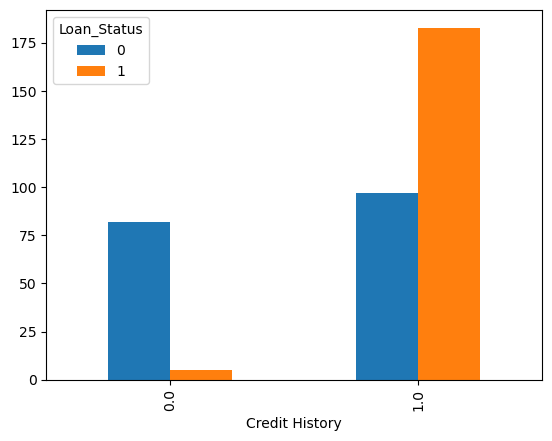

In [20]:
crosstab = pd.crosstab(df['Credit History'], df['Loan_Status'])
crosstab.plot(kind = 'bar')

In [3]:
# So , credit history is an important factor here . In most of the case ,
# if a person's credit history is 1.0 , his loan application is accepted

<Axes: xlabel='Credit History'>

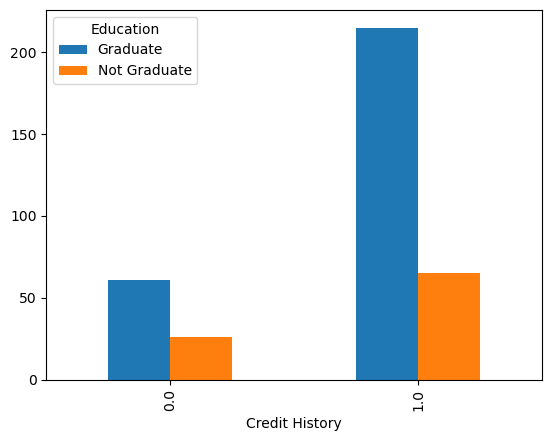

In [21]:
crosstab = pd.crosstab(df['Credit History'], df['Education'])
crosstab.plot(kind = 'bar')

In [4]:
# Credit history hase a good relation with Education . Most of the people whose credit history is 1.0 , they are greduated

<Axes: xlabel='Credit History'>

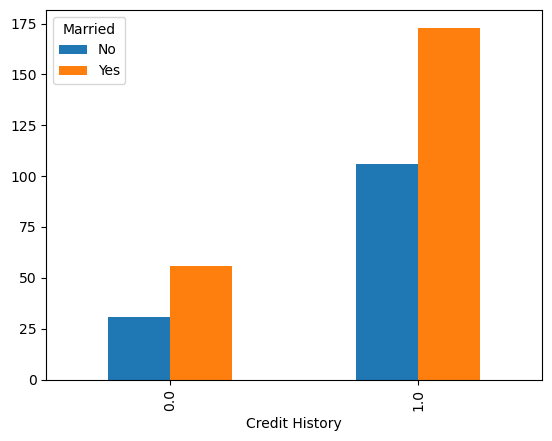

In [22]:
crosstab = pd.crosstab(df['Credit History'], df['Married'])
crosstab.plot(kind = 'bar')

In [5]:
# So , Mozst of the time , the person whose credit history is 1.0 , he is married 

# Property_Area :

In [23]:
df['Property_Area'].value_counts()

Semiurban    140
Urban        129
Rural        123
Name: Property_Area, dtype: int64

<Axes: xlabel='Property_Area'>

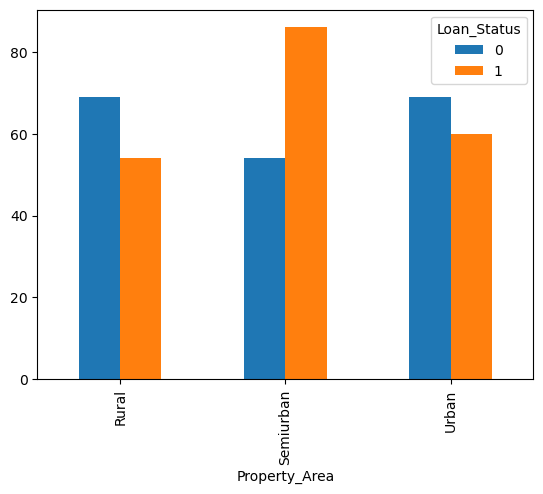

In [24]:
crosstab = pd.crosstab(df['Property_Area'], df['Loan_Status'])
crosstab.plot(kind = 'bar')

In [6]:
# So  , the people who are from Semiurban area , there loan application is accepted most of the time , thn urban and then rural

# Self_Employed

In [25]:
df['Self_Employed'].value_counts()

No     320
Yes     51
Name: Self_Employed, dtype: int64

<Axes: xlabel='Self_Employed'>

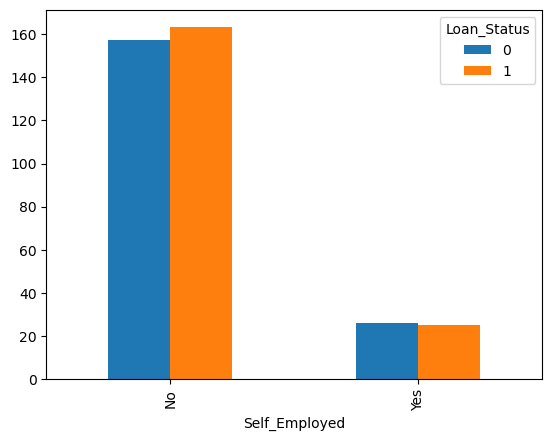

In [26]:
crosstab = pd.crosstab(df['Self_Employed'], df['Loan_Status'])
crosstab.plot(kind = 'bar')

In [7]:
# Self_Employed is not that important here . Most of the people are not Self_Employed

# Education :

In [27]:
df['Education'].value_counts()

Graduate        295
Not Graduate     97
Name: Education, dtype: int64

<Axes: xlabel='Education'>

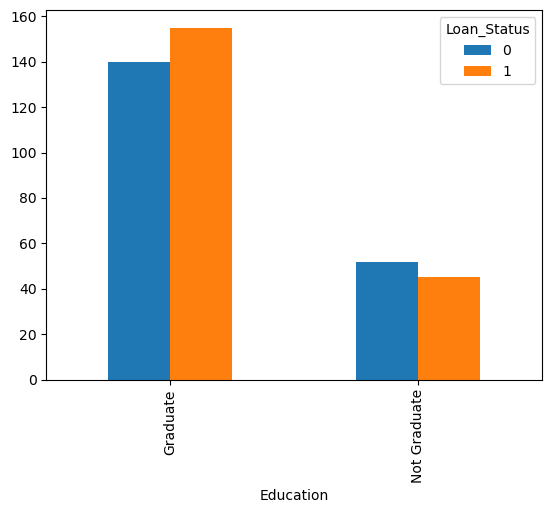

In [28]:
crosstab = pd.crosstab(df['Education'], df['Loan_Status'])
crosstab.plot(kind = 'bar')

In [8]:
# Education is also not that important factor here . The education column is imbalance here . 
# In case of Loan_status also for  Graduated and Non Graduated people , I can not see any big difference

# Dependents :

In [29]:
df['Dependents'].value_counts()

0     215
2      68
1      67
3+     31
Name: Dependents, dtype: int64

<Axes: xlabel='Dependents'>

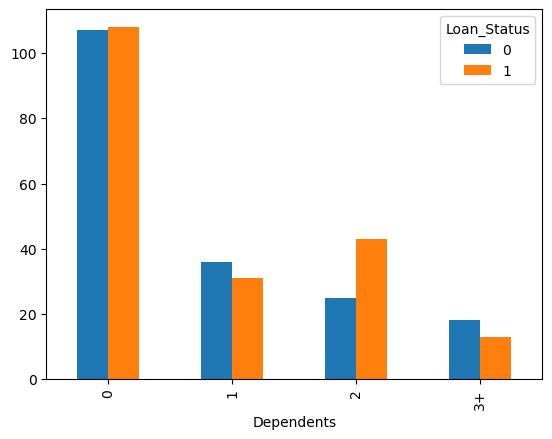

In [30]:
crosstab = pd.crosstab(df['Dependents'], df['Loan_Status'])
crosstab.plot(kind = 'bar')

In [9]:
# People whose dependents is 2 , there Loan application accepted probablity is high 

# Married :

In [31]:
df['Married'].value_counts()

Yes    248
No     143
Name: Married, dtype: int64

<Axes: xlabel='Married'>

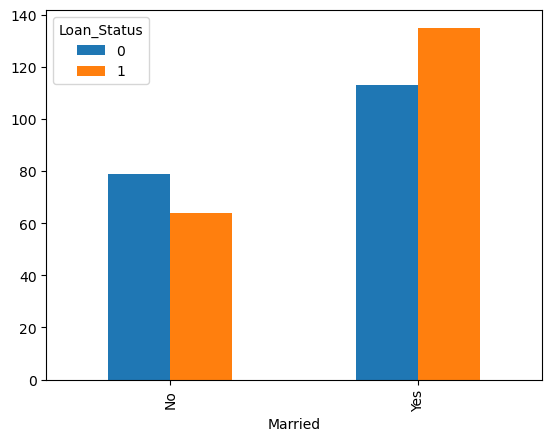

In [32]:
crosstab = pd.crosstab(df['Married'], df['Loan_Status'])
crosstab.plot(kind = 'bar')

In [10]:
# So , Most of the time , the people whose loan aplication is accepted , they are married 

# Gender :

In [33]:
df['Gender'].value_counts()

Male      312
Female     74
Name: Gender, dtype: int64

<Axes: xlabel='Gender'>

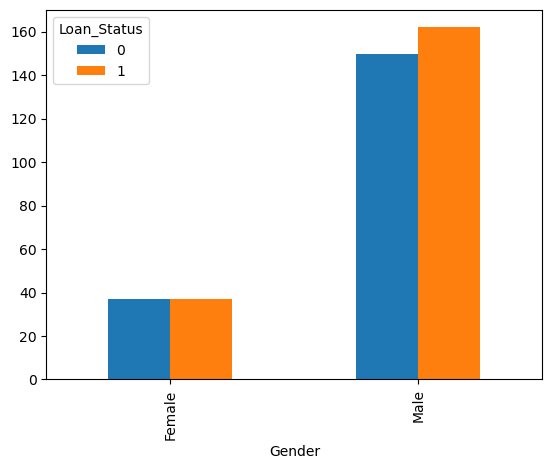

In [34]:
crosstab = pd.crosstab(df['Gender'] , df['Loan_Status'])
crosstab.plot(kind = 'bar')

In [11]:
# Can't see any significant difference between Gender and Loan_status 

# Data preprocessing :

In [35]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Applicant Income', 'CoapplicantIncome', 'Loan_Amount',
       'Loan_Amount_Term', 'Credit History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [36]:
New_df = df.copy()

In [37]:
New_df.isnull().sum()

Gender                6
Married               1
Dependents           11
Education             0
Self_Employed        21
Applicant Income      0
CoapplicantIncome     0
Loan_Amount          17
Loan_Amount_Term     11
Credit History       25
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
# I will replace the null values of 'Gender', 'Married', 'Dependents','Self_Employed', 'Credit History'. Because , the dataset is quite small.
# If I delete those rows , then It might affect the performence of the algorithm 

In [38]:
for col in ['Gender', 'Married', 'Dependents','Self_Employed']:
    New_df[col] = New_df[col].fillna(New_df[col].mode()[0])

In [39]:
New_df['Credit History'] = New_df['Credit History'].fillna(New_df['Credit History'].mode()[0])

In [13]:
# I will use mapping to handle null values of the dependents

In [40]:
New_df['Dependents'].value_counts()

0     226
2      68
1      67
3+     31
Name: Dependents, dtype: int64

In [41]:
New_df['Dependents'] = New_df['Dependents'].map({'0': 3 , '2': 2, '1': 1 , '3+': 0})

In [42]:
New_df

,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
218,Female,Yes,2,Graduate,No,4283,2383.0,127.0,360.0,1.0,Semiurban,1
487,Male,Yes,2,Graduate,Yes,4583,2083.0,160.0,360.0,1.0,Semiurban,1
262,Female,No,3,Graduate,No,7200,0.0,120.0,360.0,1.0,Rural,1
536,Male,No,2,Graduate,No,3617,0.0,107.0,360.0,1.0,Semiurban,1
608,Female,No,3,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
...,...,...,...,...,...,...,...,...,...,...,...,...
595,Male,Yes,2,Not Graduate,Yes,6383,1000.0,187.0,360.0,1.0,Rural,0
596,Male,No,3,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,0
599,Female,No,0,Graduate,No,416,41667.0,350.0,180.0,1.0,Urban,0
604,Male,Yes,3,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,0


In [43]:
New_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 218 to 612
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             392 non-null    object 
 1   Married            392 non-null    object 
 2   Dependents         392 non-null    int64  
 3   Education          392 non-null    object 
 4   Self_Employed      392 non-null    object 
 5   Applicant Income   392 non-null    int64  
 6   CoapplicantIncome  392 non-null    float64
 7   Loan_Amount        375 non-null    float64
 8   Loan_Amount_Term   381 non-null    float64
 9   Credit History     392 non-null    float64
 10  Property_Area      392 non-null    object 
 11  Loan_Status        392 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 39.8+ KB


In [44]:
New_df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant Income      0
CoapplicantIncome     0
Loan_Amount          17
Loan_Amount_Term     11
Credit History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [45]:
New_df.corr()

,Dependents,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Loan_Status
Dependents,1.000000,-0.180596,-0.055399,-0.241540,0.143894,0.033893,0.033180
Applicant Income,-0.180596,1.000000,-0.128742,0.517089,-0.008836,-0.044970,-0.038719
CoapplicantIncome,-0.055399,-0.128742,1.000000,0.210272,-0.088191,0.022746,-0.051059
Loan_Amount,-0.241540,0.517089,0.210272,1.000000,0.029790,-0.009464,-0.076989
Loan_Amount_Term,0.143894,-0.008836,-0.088191,0.029790,1.000000,0.001216,-0.035485
Credit History,0.033893,-0.044970,0.022746,-0.009464,0.001216,1.000000,0.483696
Loan_Status,0.033180,-0.038719,-0.051059,-0.076989,-0.035485,0.483696,1.000000


In [46]:
New_df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Applicant Income', 'CoapplicantIncome', 'Loan_Amount',
       'Loan_Amount_Term', 'Credit History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [14]:
# Checking the correlation , I found that the columns 'Applicant Income', 'CoapplicantIncome', 'Loan_Amount',
# 'Loan_Amount_Term' are not that important with the Loan_Status . Hence I will remove these columns 

In [47]:
M_df = New_df.drop(['Applicant Income', 'CoapplicantIncome', 'Loan_Amount',
       'Loan_Amount_Term'], axis = 1)
M_df

,Gender,Married,Dependents,Education,Self_Employed,Credit History,Property_Area,Loan_Status
218,Female,Yes,2,Graduate,No,1.0,Semiurban,1
487,Male,Yes,2,Graduate,Yes,1.0,Semiurban,1
262,Female,No,3,Graduate,No,1.0,Rural,1
536,Male,No,2,Graduate,No,1.0,Semiurban,1
608,Female,No,3,Graduate,No,1.0,Rural,1
...,...,...,...,...,...,...,...,...
595,Male,Yes,2,Not Graduate,Yes,1.0,Rural,0
596,Male,No,3,Graduate,No,0.0,Semiurban,0
599,Female,No,0,Graduate,No,1.0,Urban,0
604,Male,Yes,3,Not Graduate,No,1.0,Urban,0


# Spliting the dataset and Handling the categorical columns :

In [48]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [49]:
X = M_df.drop('Loan_Status', axis = 1)
y = M_df['Loan_Status']

In [50]:
X

,Gender,Married,Dependents,Education,Self_Employed,Credit History,Property_Area
218,Female,Yes,2,Graduate,No,1.0,Semiurban
487,Male,Yes,2,Graduate,Yes,1.0,Semiurban
262,Female,No,3,Graduate,No,1.0,Rural
536,Male,No,2,Graduate,No,1.0,Semiurban
608,Female,No,3,Graduate,No,1.0,Rural
...,...,...,...,...,...,...,...
595,Male,Yes,2,Not Graduate,Yes,1.0,Rural
596,Male,No,3,Graduate,No,0.0,Semiurban
599,Female,No,0,Graduate,No,1.0,Urban
604,Male,Yes,3,Not Graduate,No,1.0,Urban


In [51]:
oh = OneHotEncoder(drop = 'first', handle_unknown='ignore')
preprocessor = ColumnTransformer(
transformers = [
    ('ohe' , oh , [0,1,3,4,6])
],
remainder = 'passthrough')

# Using different models :

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from  sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.model_selection import GridSearchCV

In [53]:
# In the cross validation , I will chose true negetive . In the model where true negetive (Actual Loan status is no but model predicting yes )
# is less . I will chose that  model .

# Using LogisticRegression :

In [54]:
lg_score = []
for i in range(100):
    X_train , X_test , y_train , y_test = train_test_split(X,y,test_size  = 0.2 , random_state = i)
    X_train_dummy = preprocessor.fit_transform(X_train)
    X_test_dummy = preprocessor.transform(X_test)
    lg = LogisticRegression()
    lg.fit(X_train_dummy , y_train)
    y_pred_lg = lg.predict(X_test_dummy)
    lg_score.append(accuracy_score(y_test , y_pred_lg))

In [55]:
print("best score :", lg_score[np.argmax(lg_score)])
print("best random_state :", np.argmax(lg_score))

best score : 0.7974683544303798
best random_state : 17


In [56]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size  = 0.2 , random_state = 17)
X_train_dummy = preprocessor.fit_transform(X_train)
X_test_dummy = preprocessor.transform(X_test)

In [57]:
lg = LogisticRegression()
lg.fit(X_train_dummy , y_train)
y_pred_lg = lg.predict(X_test_dummy)
print(accuracy_score(y_test , y_pred_lg))

0.7974683544303798


In [58]:
confusion_matrix(y_test , y_pred_lg)

array([[27, 10],
       [ 6, 36]], dtype=int64)

# Using KNN :

In [81]:
knn_score = []
for i in range(100):
    X_train , X_test , y_train , y_test = train_test_split(X,y,test_size  = 0.2 , random_state = i)
    X_train_dummy = preprocessor.fit_transform(X_train)
    X_test_dummy = preprocessor.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors = 7 , weights = 'distance')
    knn.fit(X_train_dummy , y_train)
    y_pred_knn = knn.predict(X_test_dummy)
    knn_score.append(accuracy_score(y_test , y_pred_knn))

In [82]:
print("best score :", knn_score[np.argmax(knn_score)])
print("best random_state :", np.argmax(knn_score))

best score : 0.7468354430379747
best random_state : 21


In [105]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size  = 0.2 , random_state = 21)
X_train_dummy = preprocessor.fit_transform(X_train)
X_test_dummy = preprocessor.transform(X_test)

In [108]:
param_grid = {
    'n_neighbors':[4,5,6,7,10],
    'weights':['distance', 'uniform']
    
}

grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_dummy, y_train)

y_pred_dt = grid_search.best_estimator_.predict(X_test_dummy)

In [109]:
print('accuracy score :',accuracy_score(y_test , y_pred_knn))
print('best parameters :',grid_search.best_params_)

accuracy score : 0.569620253164557
best parameters : {'n_neighbors': 4, 'weights': 'distance'}


# Using  DecisionTreeClassifier :

In [52]:
dt_score = []
for i in range(100):
    X_train , X_test , y_train , y_test = train_test_split(X,y,test_size  = 0.2 , random_state = i)
    X_train_dummy = preprocessor.fit_transform(X_train)
    X_test_dummy = preprocessor.transform(X_test)
    dt = DecisionTreeClassifier(max_depth = 10)
    dt.fit(X_train_dummy , y_train)
    y_pred_dt = dt.predict(X_test_dummy)
    dt_score.append(accuracy_score(y_test , y_pred_dt))

In [53]:
print("best score :", dt_score[np.argmax(dt_score)])
print("best random_state :", np.argmax(dt_score))

best score : 0.6962025316455697
best random_state : 47


In [86]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size  = 0.2 , random_state = 47)
X_train_dummy = preprocessor.fit_transform(X_train)
X_test_dummy = preprocessor.transform(X_test)

In [87]:
param_grid = {
    'max_depth':[6,8,10]
    
}

grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train_dummy, y_train)

y_pred_dt = grid_search.best_estimator_.predict(X_test_dummy)

In [88]:
print('accuracy score :',accuracy_score(y_test , y_pred_dt))
print('best parameters :',grid_search.best_params_)

accuracy score : 0.6582278481012658
best parameters : {'max_depth': 6}


In [89]:
X_train_dummy = preprocessor.fit_transform(X_train)
X_test_dummy = preprocessor.transform(X_test)
dt = DecisionTreeClassifier(max_depth = 6)
dt.fit(X_train_dummy , y_train)
y_pred_dt = dt.predict(X_test_dummy)

In [90]:
confusion_matrix(y_test , y_pred_dt)

array([[21, 21],
       [ 7, 30]], dtype=int64)

# Using RandomForestClassifier and GradienBoostingClassifier :

In [91]:
rf_score = []
for i in range(100):
    X_train , X_test , y_train , y_test = train_test_split(X,y,test_size  = 0.2 , random_state = i)
    X_train_dummy = preprocessor.fit_transform(X_train)
    X_test_dummy = preprocessor.transform(X_test)
    rf = RandomForestClassifier(n_estimators = 100 ,max_depth = 10)
    rf.fit(X_train_dummy , y_train)
    y_pred_rf = rf.predict(X_test_dummy)
    rf_score.append(accuracy_score(y_test , y_pred_rf))

In [92]:
print("best score :", rf_score[np.argmax(rf_score)])
print("best random_state :", np.argmax(rf_score))

best score : 0.7341772151898734
best random_state : 62


In [93]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size  = 0.2 , random_state = 62)
X_train_dummy = preprocessor.fit_transform(X_train)
X_test_dummy = preprocessor.transform(X_test)

In [94]:
param_grid = {
    'n_estimators':[100 , 200 , 500],
    'max_depth':[6,8,10]
    
}

grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train_dummy, y_train)

y_pred_rf = grid_search.best_estimator_.predict(X_test_dummy)

In [95]:
print('accuracy score :',accuracy_score(y_test , y_pred_rf))
print('best parameters :',grid_search.best_params_)

accuracy score : 0.7341772151898734
best parameters : {'max_depth': 6, 'n_estimators': 500}


In [96]:
X_train_dummy = preprocessor.fit_transform(X_train)
X_test_dummy = preprocessor.transform(X_test)
rf = RandomForestClassifier(n_estimators = 500 ,max_depth = 6)
rf.fit(X_train_dummy , y_train)
y_pred_rf = rf.predict(X_test_dummy)

In [97]:
confusion_matrix(y_test , y_pred_rf)

array([[23, 11],
       [10, 35]], dtype=int64)

# Using gradientBoostingClassifier :

In [98]:
gb_score = []
for i in range(100):
    X_train , X_test , y_train , y_test = train_test_split(X,y,test_size  = 0.2 , random_state = i)
    X_train_dummy = preprocessor.fit_transform(X_train)
    X_test_dummy = preprocessor.transform(X_test)
    gb = GradientBoostingClassifier(n_estimators = 100 ,max_depth = 1)
    gb.fit(X_train_dummy , y_train)
    y_pred_gb = gb.predict(X_test_dummy)
    gb_score.append(accuracy_score(y_test , y_pred_gb))

In [99]:
print("best score :", gb_score[np.argmax(gb_score)])
print("best random_state :", np.argmax(gb_score))

best score : 0.7974683544303798
best random_state : 22


In [100]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size  = 0.2 , random_state = 22)
X_train_dummy = preprocessor.fit_transform(X_train)
X_test_dummy = preprocessor.transform(X_test)

In [101]:
param_grid = {
    'n_estimators':[100 , 200 , 500],
    
}

grid_search = GridSearchCV(gb, param_grid, cv=5)
grid_search.fit(X_train_dummy, y_train)

y_pred_gb = grid_search.best_estimator_.predict(X_test_dummy)

In [102]:
print('accuracy score :',accuracy_score(y_test , y_pred_gb))
print('best parameters :',grid_search.best_params_)

accuracy score : 0.7974683544303798
best parameters : {'n_estimators': 100}


In [103]:
X_train_dummy = preprocessor.fit_transform(X_train)
X_test_dummy = preprocessor.transform(X_test)
gb = GradientBoostingClassifier(n_estimators = 100 ,max_depth = 1)
gb.fit(X_train_dummy , y_train)
y_pred_gb = gb.predict(X_test_dummy)

In [104]:
confusion_matrix(y_test , y_pred_gb)

array([[22, 14],
       [ 2, 41]], dtype=int64)

# So , Here I will go for logisticRegression because here the true negetive value is least :

# prediction model :

In [59]:
def Loan_status_prediction(Gender, Married, Dependents, Education, Self_Employed, Credit_History, Property_Area):
  features = np.array([[Gender, Married, Dependents, Education, Self_Employed, Credit_History, Property_Area]])
  transformed_features = preprocessor.transform(features)
  prediction = lg.predict(transformed_features).reshape(1,-1)
  return prediction[0]